In [1]:
!pip install -r requirements.txt

In [1]:
# -*- coding: utf-8 -*-
#!/usr/bin/env python3
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabula import read_pdf

In [40]:
# MSCI country lists
MSCI_EUROPE_LIST = ['Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany', 
                    'Ireland', 'Isreal', 'Italy', 'Netherlands', 'Norway', 'Portugal', 'Spain', 
                    'Sweden', 'Switzerland', 'United Kingdom', 'UK']

MSCI_NORTH_AMERICA_LIST = ['Canada', 'United States', 'USA']

MSCI_PACIFIC_LIST = ['Japan', 'Australia', 'Hong Kong SAR', 'Hong Kong', 'Singapore', 'New Zealand']

MSCI_EMERGING_MARKETS_LIST = ['Brazil', 'Chile', 'China', 'Colombia', 'Czech Republic', 'Czech Rep.',
                             'Egypt', 'Greece', 'Hungary', 'India', 'Indonesia', 'Korea', 'Kuwait', 'Malaysia', 
                             'Mexico', 'Philippines', 'Poland', 'Qatar', 
                             'Saudi Arabia', 'South Africa', 'Taiwan Province of China', 'Taiwan', 'Thailand', 
                             'Turkey', 'United Arab Emirates', 'UAE']

LABELS = ['Europe', 'North America', 'Pacific', 'Emerging Markets']
LABELS2 = ['Developed Markets', 'Emerging Markets']

In [55]:
# GDP data from the World Economic Outlook Database, converted to a tab delimited CSV file
df = pd.read_csv('./WEOApr2023all.csv', delimiter='\t', decimal='.', thousands=',', encoding='utf-16', engine='python')

# MCAP data from the monthly FTSE All-World Index Factsheet
# https://research.ftserussell.com/Analytics/FactSheets/Home/DownloadSingleIssue?openfile=open&issueName=AWORLDS&isManual=False
inch = 0.393701
t = 2.5
l = 1
b = 27
r = 13
# read the table on page 3 of the PDF in a predefined area
mcap_df = read_pdf('./AWORLDS_20230428.pdf', pages=3, multiple_tables=False, guess=False, area=[t*inch*72,l*inch*72,b*inch*72,r*inch*72])    

In [56]:
# helper functions
def get_gdp_countries_from_list(msci_list, gdp_df):  
    msci_frame = pd.DataFrame()
    
    for i in msci_list:
        tmp = gdp_df.loc[df['Country'] == i]
        msci_frame = pd.concat([msci_frame, tmp])
    
    
    min_date = str(round(min(msci_frame['Estimates Start After'])))
    
    return [msci_frame, min_date]

def get_msci_gdp(date, msci_europe, msci_north_america, msci_pacific, msci_emerging_markets):
    
    #remove NaN values if necessary
    print('Filtering out NaN countries: '+msci_emerging_markets.loc[msci_emerging_markets[date].isna()]['Country'])
    msci_emerging_markets = msci_emerging_markets.loc[msci_emerging_markets[date].isna()==False]
    
    # GDP of each region
    msci_europe_gdp = sum(msci_europe[date].astype(float))
    msci_north_america_gdp = sum(msci_north_america[date].astype(float))
    msci_pacific_gdp = sum(msci_pacific[date].astype(float))
    msci_emerging_markets_gdp = sum(msci_emerging_markets[date].astype(float))

                
    gdp_sum = np.sum([msci_europe_gdp, msci_north_america_gdp, msci_pacific_gdp , msci_emerging_markets_gdp]) # total GDP sum
    
    msci_gdp = np.multiply([msci_europe_gdp, msci_north_america_gdp, msci_pacific_gdp , msci_emerging_markets_gdp], 100/gdp_sum)
    return msci_gdp


def get_mcap_countries_from_list(msci_list, mcap_df):     
    msci_frame = pd.DataFrame()
    
    for i in msci_list:
        tmp = (mcap_df.iloc[:,0] == i)
        msci_frame = pd.concat([msci_frame, mcap_df[tmp]])
    
    return msci_frame.iloc[:,[0,3]]

def get_msci_mcap(msci_europe, msci_north_america, msci_pacific, msci_emerging_markets):
   
    # MCAP for each region
    msci_europe_mcap = sum(msci_europe.iloc[:,1].astype(float))
    msci_north_america_mcap = sum(msci_north_america.iloc[:,1].astype(float))
    msci_pacific_mcap = sum(msci_pacific.iloc[:,1].astype(float))
    msci_emerging_markets_mcap = sum(msci_emerging_markets.iloc[:,1].astype(float))
    
    mcap_sum = np.sum([msci_europe_mcap, msci_north_america_mcap, msci_pacific_mcap , msci_emerging_markets_mcap]) # total MCAP sum
    
    msci_mcap = np.multiply([msci_europe_mcap, msci_north_america_mcap, msci_pacific_mcap , msci_emerging_markets_mcap], 100/mcap_sum)
    return msci_mcap

Series([], Name: Country, dtype: object)
Gross Domestic Product ratio in %:
['Europe', 'North America', 'Pacific', 'Emerging Markets']
[21.30805384 31.04584911  7.79534461 39.85075244]


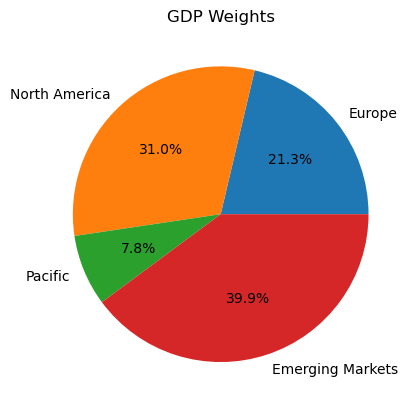

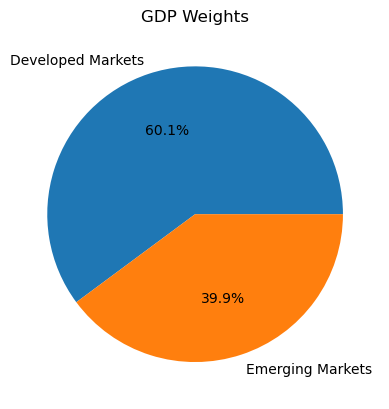

In [57]:
# get GDP data in US Dollar
gdp_df = df.loc[df['Subject Descriptor'] == 'Gross domestic product, current prices']
gdp_df = gdp_df.loc[df['Units'] == 'U.S. dollars']    
    
# GDP of regions
[msci_europe, min_date_EU] = get_gdp_countries_from_list(MSCI_EUROPE_LIST, gdp_df)
[msci_north_america, min_date_NA] = get_gdp_countries_from_list(MSCI_NORTH_AMERICA_LIST, gdp_df)
[msci_pacific, min_date_PA] = get_gdp_countries_from_list(MSCI_PACIFIC_LIST, gdp_df)
[msci_emerging_markets, min_date_EM] = get_gdp_countries_from_list(MSCI_EMERGING_MARKETS_LIST, gdp_df)
    
min_date = str(datetime.datetime.now().year) # use estimates for current year
gdp = get_msci_gdp(min_date, msci_europe, msci_north_america, msci_pacific, msci_emerging_markets)

print(f"Gross Domestic Product ratio in %:\n{LABELS}\n{gdp}")
plt.pie(x=gdp, labels=LABELS, autopct='%1.1f%%')
plt.title("GDP Weights")
plt.show()

gdp2 = [sum(gdp[0:3]), gdp[3]] # Add NA, PA and EU together
plt.title("GDP Weights")
plt.pie(x=gdp2, labels=LABELS2, autopct='%1.1f%%')
plt.show()


Market Capitalization ratio:
['Europe', 'North America', 'Pacific', 'Emerging Markets']
[17.28766026 61.74879808  9.55528846 11.40825321]


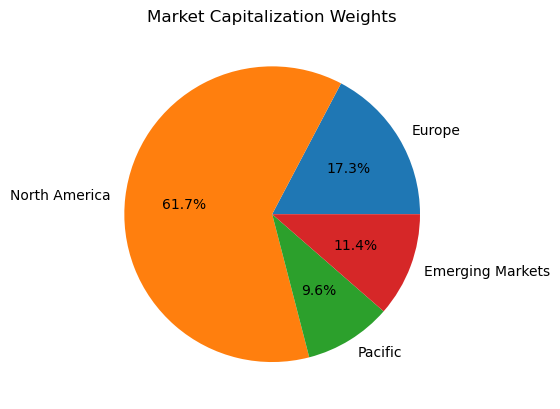

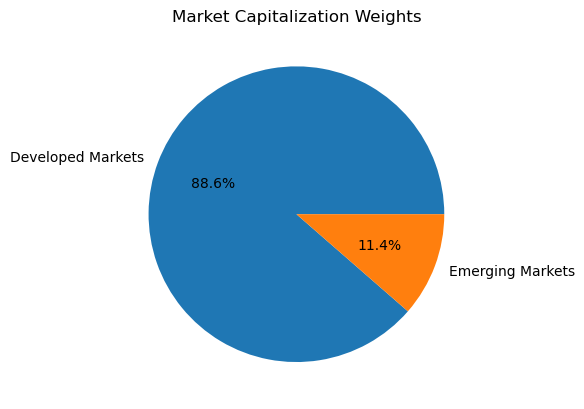

In [58]:
# Market Cap
msci_europe = get_mcap_countries_from_list(MSCI_EUROPE_LIST, mcap_df)
msci_north_america  = get_mcap_countries_from_list(MSCI_NORTH_AMERICA_LIST, mcap_df)
msci_pacific = get_mcap_countries_from_list(MSCI_PACIFIC_LIST, mcap_df)
msci_emerging_markets = get_mcap_countries_from_list(MSCI_EMERGING_MARKETS_LIST, mcap_df)
    
mcap =  get_msci_mcap(msci_europe, msci_north_america, msci_pacific, msci_emerging_markets)
print(f"Market Capitalization ratio:\n{LABELS}\n{mcap}")
plt.pie(x=mcap, labels=LABELS, autopct='%1.1f%%')
plt.title("Market Capitalization Weights")
plt.show()

mcap2 = [sum(mcap[0:3]), mcap[3]] # Add NA, PA and EU together
plt.pie(x=mcap2, labels=LABELS2, autopct='%1.1f%%')
plt.title("Market Capitalization Weights")
plt.show()

Buffet Indicator:
['Europe', 'North America', 'Pacific', 'Emerging Markets']
[ 81.13204698 198.89550407 122.57685756  28.62744743]


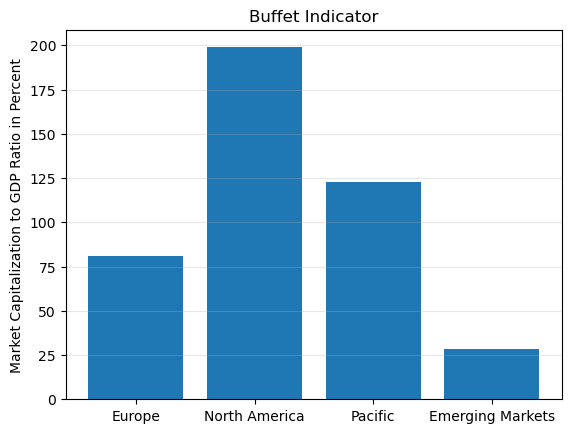

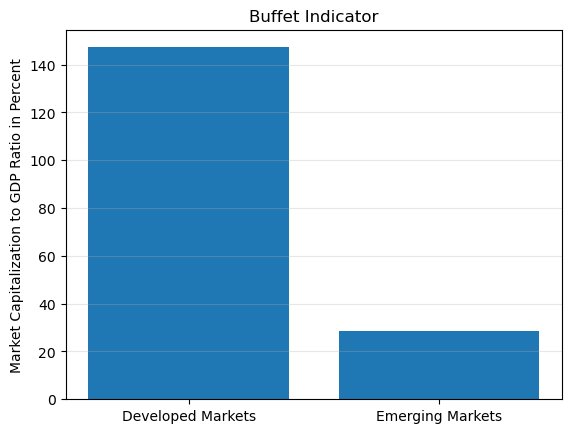

In [59]:
# 4 Regions
buffet = 100*(mcap/gdp)
print(f"Buffet Indicator:\n{LABELS}\n{buffet}")
plt.bar(x=LABELS, height=buffet)
plt.ylabel("Market Capitalization to GDP Ratio in Percent")
plt.grid(visible=True, axis='y', alpha=0.3)
plt.title("Buffet Indicator")
plt.show()

# Developed vs Emerging Markets
mcap2 = [sum(mcap[0:3]), mcap[3]]
gdp2 = [sum(gdp[0:3]), gdp[3]]
buffet2 = [100*mcap2[0]/gdp2[0], 100*mcap2[1]/gdp2[1]]
plt.bar(x=LABELS2, height=buffet2)
plt.ylabel("Market Capitalization to GDP Ratio in Percent")
plt.grid(visible=True, axis='y', alpha=0.3)
plt.title("Buffet Indicator")
plt.show()